In [1]:
# Install yfinance library
!pip install yfinance

In [2]:
# Import libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [3]:
# Load stock price data using yfinance
df = yf.download('AAPL', start='2010-01-01', end='2023-08-11')


[*********************100%***********************]  1 of 1 completed


In [4]:
# Preprocess data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))


In [5]:
# Split data into training and testing sets
training_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - training_size
train_data = scaled_data[0:training_size, :]
test_data = scaled_data[training_size:len(scaled_data), :]

In [6]:
# Create training and testing datasets
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [7]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [8]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [9]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [10]:
# Train model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
42/42 [==============================] - 29s 496ms/step - loss: 0.0038 - val_loss: 0.0021
Epoch 2/100
42/42 [==============================] - 17s 408ms/step - loss: 2.3384e-04 - val_loss: 0.0027
Epoch 3/100
42/42 [==============================] - 11s 270ms/step - loss: 1.8333e-04 - val_loss: 0.0040
Epoch 4/100
42/42 [==============================] - 10s 236ms/step - loss: 1.8004e-04 - val_loss: 0.0015
Epoch 5/100
42/42 [==============================] - 9s 217ms/step - loss: 1.5408e-04 - val_loss: 0.0015
Epoch 6/100
42/42 [==============================] - 10s 231ms/step - loss: 1.4776e-04 - val_loss: 0.0024
Epoch 7/100
42/42 [==============================] - 10s 237ms/step - loss: 1.5337e-04 - val_loss: 0.0020
Epoch 8/100
42/42 [==============================] - 9s 204ms/step - loss: 1.3909e-04 - val_loss: 0.0012
Epoch 9/100
42/42 [==============================] - 10s 246ms/step - loss: 1.4786e-04 - val_loss: 0.0018
Epoch 10/100
42/42 [==============================] 

In [11]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

19/19 [==============================] - 1s 50ms/step


In [12]:
# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])


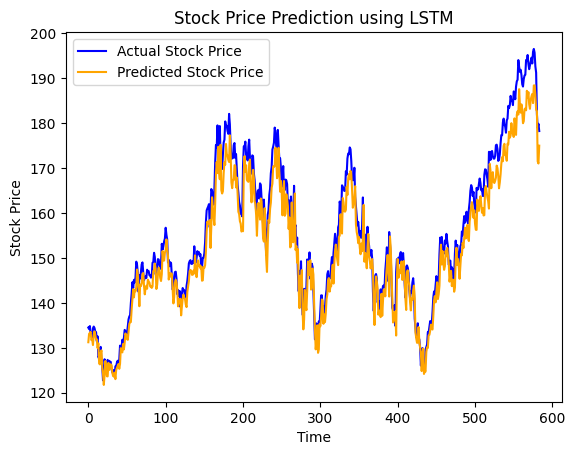

In [13]:
time_values = np.arange(0, len(y_test[0]))
plt.plot(time_values, y_test[0], color='blue', label='Actual Stock Price')
plt.plot(time_values, test_predict[:, 0], color='orange', label='Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()